In [1]:
!git clone https://github.com/meituan/YOLOv6

Cloning into 'YOLOv6'...
remote: Enumerating objects: 2543, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 2543 (delta 0), reused 1 (delta 0), pack-reused 2540
Receiving objects: 100% (2543/2543), 32.91 MiB | 15.95 MiB/s, done.
Resolving deltas: 100% (1407/1407), done.


In [2]:
cd YOLOv6

/content/YOLOv6


In [3]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 23.3 MB/s 
     |████████████████████████████████| 2.0 MB 74.7 MB/s 
     |████████████████████████████████| 237 kB 82.6 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 


In [4]:
import torch
torch.cuda.is_available() 
torch.cuda.get_device_name(0)

'Tesla T4'

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd /content/gdrive/MyDrive/data/ 

/content/gdrive/MyDrive/data


In [6]:
!unzip /content/gdrive/MyDrive/data/train.zip -d '/content/YOLOv6/data/images'

Archive:  /content/gdrive/MyDrive/data/train.zip
   creating: /content/YOLOv6/data/images/train/
  inflating: /content/YOLOv6/data/images/train/00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.2c0004107b2d383857d608ba436dfc1b.jpg  
  inflating: /content/YOLOv6/data/images/train/00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.6c8dfe2293f2c1189ec31bed2c79f806.jpg  
  inflating: /content/YOLOv6/data/images/train/00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.946feee55e61f320a7cab44367a38d39.jpg  
  inflating: /content/YOLOv6/data/images/train/0115e4df73475b550e5c6f7a88b2474f_jpg.rf.44221a112c6c7e8e57623e858216a694.jpg  
  inflating: /content/YOLOv6/data/images/train/0115e4df73475b550e5c6f7a88b2474f_jpg.rf.7e5da8e0605c0b15170b64b814ed402e.jpg  
  inflating: /content/YOLOv6/data/images/train/0115e4df73475b550e5c6f7a88b2474f_jpg.rf.94213b329d1b7ac0f9ceb1b8d6128f2a.jpg  
  inflating: /content/YOLOv6/data/images/train/02f0931b536dfba10affc3231a3d64fb_jpg.rf.8e07e67ffab0b36f82b8f081712b8379.jpg  
  inflating: /content

In [7]:
!unzip /content/gdrive/MyDrive/data/test.zip -d '/content/YOLOv6/data/images'

Archive:  /content/gdrive/MyDrive/data/test.zip
   creating: /content/YOLOv6/data/images/test/
  inflating: /content/YOLOv6/data/images/test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg  
  inflating: /content/YOLOv6/data/images/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg  
  inflating: /content/YOLOv6/data/images/test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.jpg  
  inflating: /content/YOLOv6/data/images/test/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.jpg  
  inflating: /content/YOLOv6/data/images/test/4e3117459d759798537eb52cf5bf534d_jpg.rf.ec961b62d4b0e131fae760ed1f80836b.jpg  
  inflating: /content/YOLOv6/data/images/test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.9dbdb057f6533c0c09c0eda0747fbc9e.jpg  
  inflating: /content/YOLOv6/data/images/test/654bb8835258b26c466b1c19893df451_jpg.rf.55fb7f23a4422a80793f01e152fabe4d.jpg  
  inflating: /content/YOLOv6/d

In [8]:
!unzip /content/gdrive/MyDrive/data/valid.zip -d '/content/YOLOv6/data/images'

Archive:  /content/gdrive/MyDrive/data/valid.zip
   creating: /content/YOLOv6/data/images/valid/
  inflating: /content/YOLOv6/data/images/valid/05ad7223827a29a8283f6c4b2490f52f_jpg.rf.7c134acea5ef5e18aa75defc069dc1ee.jpg  
  inflating: /content/YOLOv6/data/images/valid/0b2252c93c53e1b2e61d485b22328e2e_jpg.rf.0a885b88adc72caa71b0aa0ec20b863e.jpg  
  inflating: /content/YOLOv6/data/images/valid/0c09b79cff39932c59ecc745dd827906_jpg.rf.dd62f1f1d28dd2209e0cfe61288f6438.jpg  
  inflating: /content/YOLOv6/data/images/valid/0d9afc3d23392c3958f53d7fe71fd2f1_jpg.rf.ca639b6fd216ff59ed8fd5572c13985f.jpg  
  inflating: /content/YOLOv6/data/images/valid/15cc23c777b00d0e123f9df468f2852b_jpg.rf.ec883ea8696547433314cdd8f2c177bf.jpg  
  inflating: /content/YOLOv6/data/images/valid/18742c87a03866e042c5659ba04d1180_jpg.rf.ec846d30e3eebb02abb8056342b9de32.jpg  
  inflating: /content/YOLOv6/data/images/valid/1b7c1c9570e900f75eb974f99cbb3c60_jpg.rf.ec7b31959243b9f7a54b7c3ea89dbce6.jpg  
  inflating: /content

In [9]:
!unzip /content/gdrive/MyDrive/data/labels/train.zip -d '/content/YOLOv6/data/labels'

Archive:  /content/gdrive/MyDrive/data/labels/train.zip
   creating: /content/YOLOv6/data/labels/train/
  inflating: /content/YOLOv6/data/labels/train/00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.2c0004107b2d383857d608ba436dfc1b.txt  
  inflating: /content/YOLOv6/data/labels/train/00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.6c8dfe2293f2c1189ec31bed2c79f806.txt  
  inflating: /content/YOLOv6/data/labels/train/00bc0cacffdebe6b11bdeec56f63ee49_jpg.rf.946feee55e61f320a7cab44367a38d39.txt  
  inflating: /content/YOLOv6/data/labels/train/0115e4df73475b550e5c6f7a88b2474f_jpg.rf.44221a112c6c7e8e57623e858216a694.txt  
  inflating: /content/YOLOv6/data/labels/train/0115e4df73475b550e5c6f7a88b2474f_jpg.rf.7e5da8e0605c0b15170b64b814ed402e.txt  
  inflating: /content/YOLOv6/data/labels/train/0115e4df73475b550e5c6f7a88b2474f_jpg.rf.94213b329d1b7ac0f9ceb1b8d6128f2a.txt  
  inflating: /content/YOLOv6/data/labels/train/02f0931b536dfba10affc3231a3d64fb_jpg.rf.8e07e67ffab0b36f82b8f081712b8379.txt  
  inflating: /

In [10]:
!unzip /content/gdrive/MyDrive/data/labels/test.zip -d '/content/YOLOv6/data/labels'

Archive:  /content/gdrive/MyDrive/data/labels/test.zip
   creating: /content/YOLOv6/data/labels/test/
  inflating: /content/YOLOv6/data/labels/test/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.txt  
  inflating: /content/YOLOv6/data/labels/test/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.txt  
  inflating: /content/YOLOv6/data/labels/test/2f6fb003bb89cd401322a535acb42f65_jpg.rf.66c0a46773a9cd583fb96c3df41a9e0c.txt  
  inflating: /content/YOLOv6/data/labels/test/410993714e325a1de3e394ffe860df3a_jpg.rf.657c49ca295ef54da23469189070a075.txt  
  inflating: /content/YOLOv6/data/labels/test/4e3117459d759798537eb52cf5bf534d_jpg.rf.ec961b62d4b0e131fae760ed1f80836b.txt  
  inflating: /content/YOLOv6/data/labels/test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.9dbdb057f6533c0c09c0eda0747fbc9e.txt  
  inflating: /content/YOLOv6/data/labels/test/654bb8835258b26c466b1c19893df451_jpg.rf.55fb7f23a4422a80793f01e152fabe4d.txt  
  inflating: /content/Y

In [11]:
!unzip /content/gdrive/MyDrive/data/labels/valid.zip -d '/content/YOLOv6/data/labels'

Archive:  /content/gdrive/MyDrive/data/labels/valid.zip
   creating: /content/YOLOv6/data/labels/valid/
  inflating: /content/YOLOv6/data/labels/valid/05ad7223827a29a8283f6c4b2490f52f_jpg.rf.7c134acea5ef5e18aa75defc069dc1ee.txt  
  inflating: /content/YOLOv6/data/labels/valid/0b2252c93c53e1b2e61d485b22328e2e_jpg.rf.0a885b88adc72caa71b0aa0ec20b863e.txt  
  inflating: /content/YOLOv6/data/labels/valid/0c09b79cff39932c59ecc745dd827906_jpg.rf.dd62f1f1d28dd2209e0cfe61288f6438.txt  
  inflating: /content/YOLOv6/data/labels/valid/0d9afc3d23392c3958f53d7fe71fd2f1_jpg.rf.ca639b6fd216ff59ed8fd5572c13985f.txt  
  inflating: /content/YOLOv6/data/labels/valid/15cc23c777b00d0e123f9df468f2852b_jpg.rf.ec883ea8696547433314cdd8f2c177bf.txt  
  inflating: /content/YOLOv6/data/labels/valid/18742c87a03866e042c5659ba04d1180_jpg.rf.ec846d30e3eebb02abb8056342b9de32.txt  
  inflating: /content/YOLOv6/data/labels/valid/1b7c1c9570e900f75eb974f99cbb3c60_jpg.rf.ec7b31959243b9f7a54b7c3ea89dbce6.txt  
  inflating: /

In [12]:
!python tools/train.py --batch 16 --conf configs/yolov6s.py --data-path dataset.yaml --device 0 --epochs 100 --eval-interval 2
     


Using 1 GPU for training... 
training args are: Namespace(batch_size=16, calib=False, check_images=False, check_labels=False, conf_file='configs/yolov6s.py', data_path='dataset.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=100, eval_final_only=False, eval_interval=2, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Checking formats of images with 2 process(es): 
0 image(s) corrupted: 100% 606/606 [00:00<00:00, 3758.64it/s]
Train: Checking formats of labels with 2 process(es): 
606 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100% 606/606 [00:00<00:00, 3140.07it/s]
Train: Final numbers of valid images: 606/ labels: 606. 
0.5s for dataset initialization.


In [25]:
import glob
import cv2
for img in glob.glob("/content/YOLOv6/data/images/test/*.jpg"):
  n = cv2.imread(img)
  !python tools/infer.py --weights runs/train/exp/weights/best_ckpt.pt --source $img --yaml dataset.yaml --device 0



Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=[640, 640], iou_thres=0.45, max_det=1000, name='exp', not_save_img=False, project='runs/inference', save_dir=None, save_txt=False, source='/content/YOLOv6/data/images/test/5a35ba2ec3e0d0b2b12b1758a8ac29aa_jpg.rf.9dbdb057f6533c0c09c0eda0747fbc9e.jpg', view_img=False, weights='runs/train/exp/weights/best_ckpt.pt', yaml='dataset.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
/usr/local/lib/python3.8/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
100% 1/1 [00:00<00:00, 27.95it/s]
Results saved to runs/inference/exp
Namespace(agno

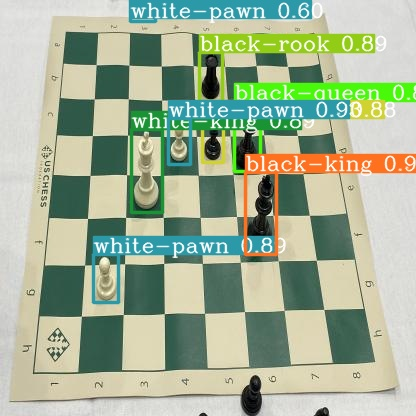

In [26]:


from IPython.display import Image #this is to render predictions
Image(filename='runs/inference/exp/685b860d412b91f5d4f7f9e643b84452_jpg.rf.2d78193e4021ae5ffb49ecd1060bebd7.jpg', width=1000)